In [108]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import IndexSlice as idx

## BW #9: US house prices

Now again, during the covid-19 pandemic, we saw house prices skyrocket, for a variety of reasons, including the number of people needing home offices. The Fed, and many other central banks, has been raising interest rates for some time, in the hopes of cooling down the economy — and with it, inflation. They’re looking at housing prices as one indicator of where prices are going, and how much they need to adjust interest rates.

The economy is huge, and no one indicator captures it entirely, or even largely. But housing prices are definitely one metric that is regularly mentioned, and which resonates with many people.

### Data

This week, we’re going to look at US housing prices. Actually, we’re going to look at prices in a number of different regions. Along the way, we’ll exercise our use of multi-indexes in Pandas, a critical tool if you’re going to retrieve information from time-based data sets.

Our data will come from [FRED](https://fred.stlouisfed.org/), the amazingly useful online tool from the St. Louis Federal Reserve. Fred provides access to a large number of data sets, most of which are freely available from the US government.

We’re going to look at housing data from six different cities in the US. The most recent housing data, from the fourth quarter of 2022, was just posted in the last few days, and we’ll examine it to better understand housing prices.

We’ll look at state housing price indexes for six different states in the US:

California (CA), from https://fred.stlouisfed.org/series/CASTHPI

Colorado (CO), from https://fred.stlouisfed.org/series/COSTHPI

Florida (FL), from https://fred.stlouisfed.org/series/FLSTHPI

Hawaii (HI), from https://fred.stlouisfed.org/series/HISTHPI

Michigan (MI), from https://fred.stlouisfed.org/series/MISTHPI

New York (NY), from https://fred.stlouisfed.org/series/NYSTHPI

The links that I’ve gives you here lead to each of these data pages; you’ll need to download the CSV files from each of them onto your computer. Each of them will have a name XXSTHPI.csv, where XX will be the two-letter abbreviation for the state (as listed above).

### Tasks

Here are the questions I’d like you to answer:

1. Create a data frame with information from all six locations. The index should contain both the date of the price (as a date), and the two-letter location code.
2. On which date, and in which region, were housing prices historically the highest?
3. How long ago was that?
4. In which region are the housing prices currently the highest?
5. What are the mean and median prices for each location in our data set?
6. What are the mean prices in New York, across the entire data set
7. Between 2000 and 2020, what were the average prices in New York?
8. Between 2000 and 2020, what were the average prices in each of New York and California?
9. Since January 2020, how much have home prices changed in each of the six regions?

The learning goals for this week are: Combining several CSV files into a single data frame, working with time series, and extracting data from multi-indexes.

#### 1. Create a data frame with information from all six locations. The index should contain both the date of the price (as a date), and the two-letter location code.

In [25]:
data_root = "./data/"
dfs = []
for path in Path(data_root).glob("*.csv"):
    code = path.name[:2]
    df = pd.read_csv(path, names=["date", "sthpi"], skiprows=1, parse_dates=["date"])
    df["state"] =  code
    dfs.append(df)
    
df = pd.concat(dfs, ignore_index=True)

In [28]:
df

,date,sthpi,state
0,1975-01-01,78.42,NY
1,1975-04-01,75.94,NY
2,1975-07-01,77.72,NY
3,1975-10-01,79.65,NY
4,1976-01-01,73.06,NY
...,...,...,...
1165,2022-07-01,765.92,FL
1166,2022-10-01,764.85,FL
1167,2023-01-01,767.64,FL
1168,2023-04-01,785.80,FL


In [31]:
df = df.set_index(["date", "state"]).sort_index()

#### 2. On which date, and in which region, were housing prices historically the highest?

In [37]:
df.groupby("state").max() # highest price for each state

,sthpi
state,
CA,929.01
CO,838.18
FL,803.85
HI,897.68
MI,512.23
NY,1014.39


In [38]:
df.groupby("date").max() # highest price for each date

,sthpi
date,
1975-01-01,78.42
1975-04-01,83.44
1975-07-01,77.72
1975-10-01,79.65
1976-01-01,73.06
...,...
2022-07-01,949.05
2022-10-01,944.84
2023-01-01,944.86


In [36]:
df.groupby(["date", "state"]).max() # highest price for each date and state

sthpi
date       state         
1975-01-01 CA       41.69
           CO       54.33
           FL       65.89
           HI       66.20
           MI       60.17
...                   ...
2023-07-01 CO      838.18
           FL      803.85
           HI      897.68
           MI      512.23
           NY     1014.39

[1170 rows x 1 columns]

In [40]:
# but we were ask to find the date and state of the highest price at all time
df["sthpi"].max()

1014.39

In [43]:
df[df["sthpi"] == df["sthpi"].max()]

,,sthpi
date,state,
2023-07-01,NY,1014.39


In [44]:
df["sthpi"].idxmax()

(Timestamp('2023-07-01 00:00:00'), 'NY')

#### 3. How long ago was that?

In [49]:
# get the difference between current date and the date of the highest price
pd.Timestamp("now") - df["sthpi"].idxmax()[0]

Timedelta('213 days 23:03:37.166453')

#### 4. In which region are the housing prices currently the highest?

In [62]:
df.loc[df.index.get_level_values("date").max()].idxmax()

sthpi    NY
dtype: object

In [63]:
df.loc[df.index[-1][0]].idxmax()

sthpi    NY
dtype: object

#### 5. What are the mean and median prices for each location in our data set?

In [67]:
df.groupby("state").agg(["mean", "median"])

sthpi        
             mean  median
state                    
CA     338.921846  239.42
CO     279.537436  237.72
FL     258.456462  192.26
HI     329.049897  261.01
MI     217.002718  228.56
NY     402.682821  315.76

#### 6. What are the mean prices in New York, across the entire data set?

In [100]:
df.loc[(slice(None), "NY"),]

,,sthpi
date,state,
1975-01-01,NY,78.42
1975-04-01,NY,75.94
1975-07-01,NY,77.72
1975-10-01,NY,79.65
1976-01-01,NY,73.06
...,...,...
2022-07-01,NY,949.05
2022-10-01,NY,944.84
2023-01-01,NY,944.86


In [78]:
df.xs("NY", level="state").mean()

sthpi    402.682821
dtype: float64

#### 7. Between 2000 and 2020, what were the average prices in New York?

In [104]:
df.loc[(slice("2000","2020"), "NY"),].mean()

sthpi    569.997976
dtype: float64

#### 8. Between 2000 and 2020, what were the average prices in each of New York and California?

In [107]:
df.loc[(slice("2000", "2020"), ["NY", "CA"]),].groupby("state").mean()

,sthpi
state,
CA,489.627976
NY,569.997976


In [111]:
df.loc[idx["2000":"2020", ["NY", "CA"]], ].groupby("state").mean()

,sthpi
state,
CA,489.627976
NY,569.997976


#### 9. Since January 2020, how much have home prices changed in each of the six regions?

In [146]:
df.loc['2020':, "sthpi"].groupby("state").pct_change(periods=11).tail(6).sort_values(ascending=False)

date        state
2023-07-01  FL       0.562725
            HI       0.379158
            MI       0.370222
            CO       0.352034
            NY       0.351691
            CA       0.327916
Name: sthpi, dtype: float64

In [137]:
(df.loc[df.index[-1][0], "sthpi"] - df.loc["2020-01-01", "sthpi"]) / df.loc["2020-01-01", "sthpi"]

state
CA    0.386872
CO    0.418072
FL    0.653196
HI    0.405414
MI    0.444570
NY    0.415204
Name: sthpi, dtype: float64

In [138]:
df

sthpi
date       state         
1975-01-01 CA       41.69
           CO       54.33
           FL       65.89
           HI       66.20
           MI       60.17
...                   ...
2023-07-01 CO      838.18
           FL      803.85
           HI      897.68
           MI      512.23
           NY     1014.39

[1170 rows x 1 columns]

#### Bonus

In [147]:
df.groupby("state").agg(["min", "max", "mean", "median", "std", "var"])

sthpi                                                       
         min      max        mean  median         std           var
state                                                              
CA     41.69   929.01  338.921846  239.42  226.217202  51174.222531
CO     54.33   838.18  279.537436  237.72  186.914232  34936.930117
FL     65.89   803.85  258.456462  192.26  163.480236  26725.787718
HI     48.92   897.68  329.049897  261.01  213.938674  45769.756308
MI     60.17   512.23  217.002718  228.56  103.952656  10806.154791
NY     73.06  1014.39  402.682821  315.76  232.443293  54029.884471

<Axes: xlabel='date,state'>

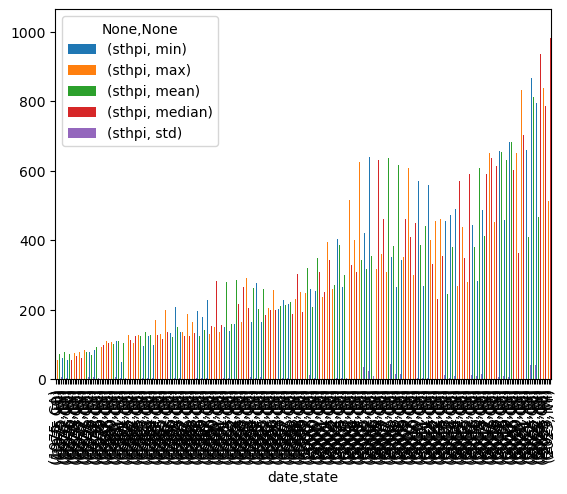

In [157]:
df.groupby([df.index.get_level_values("date").year, "state"]).agg(["min", "max", "mean", "median", "std"]).plot.bar()